<a href="https://colab.research.google.com/github/cristinalestari/assignment/blob/main/assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

assigment10.ipynb  GMB_02/  GMB_05/                      metawin.jpg
assigment11.ipynb  GMB_03/  IMG_20200814_131553_HDR.jpg
GMB_01/            GMB_04/  IMG_20200814_133326_HDR.jpg


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_image("dataset")
data = []
labels = []

In [ ]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
 
  #preprocessing

	image = np.array(image.resize((221, 221))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

In [ ]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (5,5), activation='relu', input_shape=(168,168,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 164, 164, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 82, 82, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 32)        9

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [ ]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=32)

Epoch 1/20
14/14 [==============================] - 10s 727ms/step - loss: 1.5998 - accuracy: 0.2265 - val_loss: 1.5734 - val_accuracy: 0.2192
Epoch 2/20
14/14 [==============================] - 10s 718ms/step - loss: 1.4382 - accuracy: 0.4005 - val_loss: 1.4580 - val_accuracy: 0.3699
Epoch 3/20
14/14 [==============================] - 10s 721ms/step - loss: 1.2200 - accuracy: 0.4943 - val_loss: 1.2042 - val_accuracy: 0.4795
Epoch 4/20
14/14 [==============================] - 10s 723ms/step - loss: 1.0173 - accuracy: 0.5767 - val_loss: 1.1384 - val_accuracy: 0.5274
Epoch 5/20
14/14 [==============================] - 10s 724ms/step - loss: 0.9172 - accuracy: 0.6362 - val_loss: 0.9980 - val_accuracy: 0.5342
Epoch 6/20
14/14 [==============================] - 10s 725ms/step - loss: 0.7306 - accuracy: 0.7094 - val_loss: 0.9283 - val_accuracy: 0.6096
Epoch 7/20
14/14 [==============================] - 10s 725ms/step - loss: 0.6852 - accuracy: 0.7460 - val_loss: 0.8627 - val_accuracy: 0.6507

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


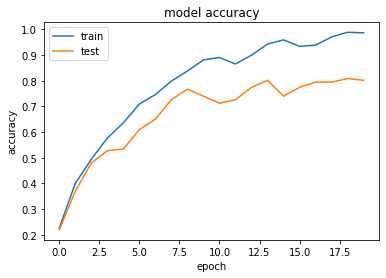

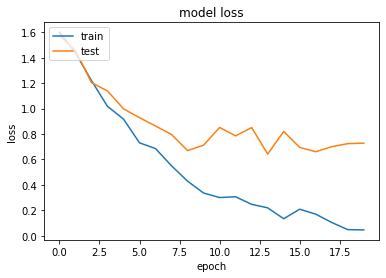

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.86      0.63      0.73        38
      GMB_02       0.78      0.89      0.83        28
      GMB_03       0.86      0.79      0.83        24
      GMB_04       0.77      0.92      0.84        26
      GMB_05       0.76      0.83      0.79        30

    accuracy                           0.80       146
   macro avg       0.81      0.81      0.80       146
weighted avg       0.81      0.80      0.80       146



In [ ]:
model1.save('nnmodel_scene')

In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200814_133326_HDR.jpg'

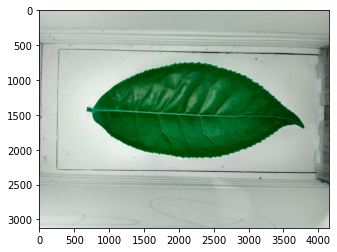

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('')
image_testing = np.array(image_testing.resize((64, 64))) / 121.0
image_testing.shape

(64, 64, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 168, 168, 3)
